<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience1/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sickit Learn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, decomposition

In [ ]:
# Import MNIST using sklearn
X, y = datasets.fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


In [ ]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

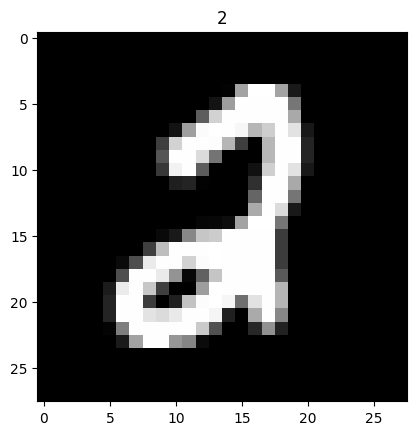

In [ ]:
# Plot using Matplotlip
# Pick a sample plot
sample = 4269
image = X[sample].reshape(28, 28)
label = y[sample]
fig = plt.figure
plt.imshow(image, cmap="gray") # "gray_r"
plt.title(label)
plt.show()

In [ ]:
num = 20
images = X[:num]
labels = y[:num]

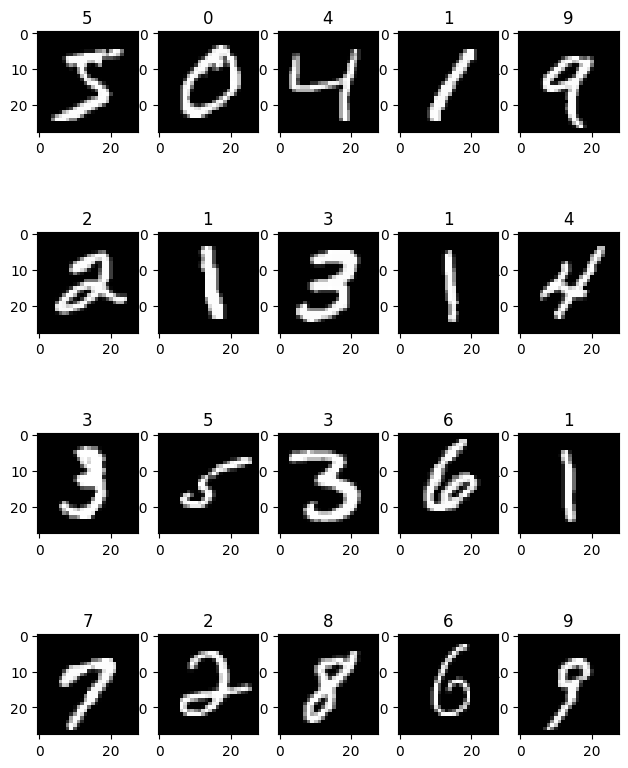

In [ ]:
num_row = 4
num_col = 5
fig, axs = plt.subplots(num_row,num_col, figsize=(1.5*num_col, 2*num_col))
for i in range(num):
  ax = axs[i//num_col, i%num_col] # used to set the coordinate of that specific subplot
  ax.imshow(images[i].reshape(28,28), cmap="gray")
  ax.set_title(labels[i])
plt.show()

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
print(X.shape, y.shape)
# print(X, y)

(150, 2) (150,)


(1.5, 4.9)

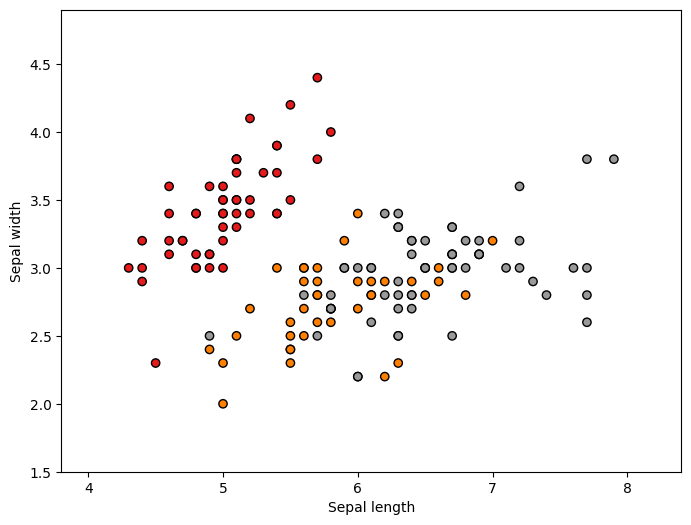

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf() #clear the plt

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

In [ ]:
# Generated Dataset
X, y = datasets.make_regression(n_samples=20, n_features=1, random_state=0, noise=4.0, bias=100.0)
print(X)
print(y)

[[-0.15135721]
 [ 0.40015721]
 [ 0.97873798]
 [-0.85409574]
 [-0.97727788]
 [ 0.3130677 ]
 [-0.10321885]
 [-0.20515826]
 [ 0.33367433]
 [ 1.49407907]
 [ 0.95008842]
 [ 0.12167502]
 [ 1.45427351]
 [ 1.86755799]
 [ 0.14404357]
 [ 0.4105985 ]
 [ 0.76103773]
 [ 2.2408932 ]
 [ 0.44386323]
 [ 1.76405235]]
[ 98.01970393 108.45865411 107.77654399  90.31520078  92.04796546
 100.14472604 104.37128562  95.20896669 102.50526212 122.11966081
 112.28760019 107.32614044 121.44454917 125.80345967 104.3306721
 112.02618102 106.59661396 129.8571502  113.51286154 125.42202601]


# Linear Regression

In [7]:
!gdown --id 1NgT-hM1xDVpnharJVtCwN4FiJE46XGBL

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NgT-hM1xDVpnharJVtCwN4FiJE46XGBL
To: /content/Session04.Workshop1.Salary_Data.csv
100% 454/454 [00:00<00:00, 1.55MB/s]


In [9]:
dataset = pd.read_csv("Session04.Workshop1.Salary_Data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
dataset.shape

(30, 2)

In [ ]:
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
dataset.sample(3) # randomly select 3 entries

,YearsExperience,Salary
10,3.9,63218.0
6,3.0,60150.0
15,4.9,67938.0


In [ ]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [20]:
# Fit Simple Linear Regression to Training Data
from sklearn.linear_model import SGDRegressor
sgdreg = SGDRegressor()
sgdreg.fit(X_train, y_train)

SGDRegressor()

In [21]:
y_hat = sgdreg.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.9520568091126155

In [23]:
w0_sgd = sgdreg.intercept_
w1_sgd = sgdreg.coef_
print("Estimated coefficients by SGD:\nw_0 = {}\nw_1 = {}".format(w0_sgd, w1_sgd))

Estimated coefficients by SGD:
w_0 = [22330.83626086]
w_1 = [9947.51182656]


In [26]:
# Fit Simple Linear Regression to Training Data (2)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # Training phase

LinearRegression()

In [27]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.9553063138044949

In [28]:
w0_LR = regressor.intercept_
w1_LR = regressor.coef_
print("Estimated coefficients by Linear Regression:\nw_0 = {}\nw_1 = {}".format(w0_LR, w1_LR))

Estimated coefficients by Linear Regression:
w_0 = 25324.33537924433
w_1 = [9426.03876907]


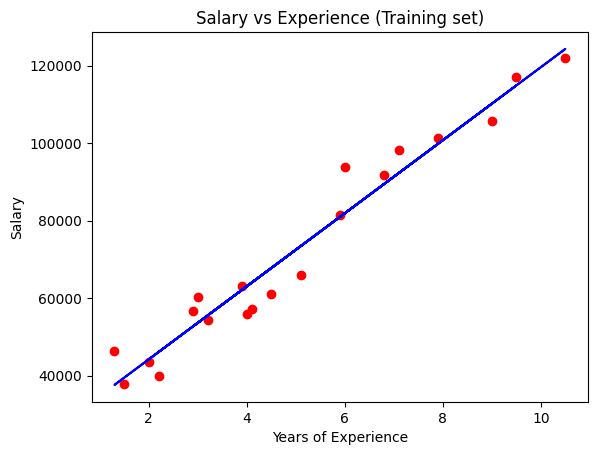

In [ ]:
# Visualize training set results
# plot the actual data points of training set
plt.scatter(X_train, y_train, color="red")
# plot the regression line (trick)
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

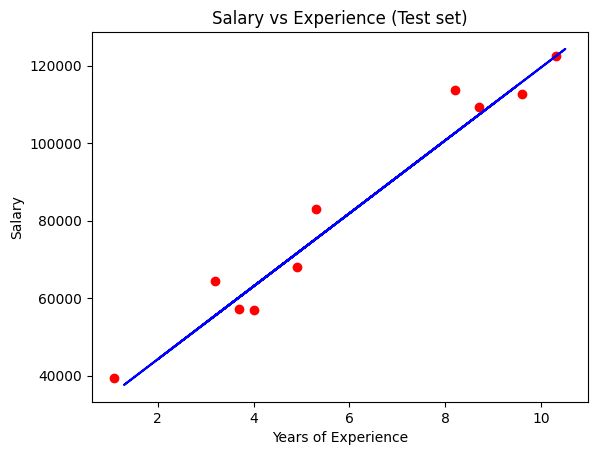

In [ ]:
# Visualize test set results
# plot the actual data points of test set
plt.scatter(X_test, y_test, color="red")
# plot the regression line (same as above)
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [ ]:
# Make new prediction
new_salary_pred = regressor.predict([[15]])
print("The predicted salary of a person with 15 years of experience is", new_salary_pred)

The predicted salary of a person with 15 years of experience is [166714.91691537]


In [ ]:
regressor.score(X_train, y_train, sample_weight=None)

0.9549236946181227

In [14]:
# Find Weight Function
def find_weight(X, y):
  m = X.shape[0] # Number of training examples
  # Appending a column of ones in X to add the bias term
  X = np.append(X, np.ones((m,1)), axis=1)
  # Reshaping y to (m,1)
  y = y.reshape(m,1)
  # The Normal Equation
  Weight = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
  return Weight

In [17]:
# Predict Function
def predict(X):
  # Appending a column of oness in the X to add the bias term
  X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
  # preds is y_hat which is the dot product of X and weight
  preds = np.dot(X, W_NE)
  return preds

In [16]:
# Plotting Predictions
# Getting the value of weight using the find_weight() function
W_NE = find_weight(X_train, y_train)
print("Estimated coefficients by Normal Equation:\nw_0 = {}\nw_1 = {}".format(W_NE[1], W_NE[0]))

Estimated coefficients by Normal Equation:
w_0 = [25324.33537924]
w_1 = [9426.03876907]


In [18]:
# Getting the predictions on X using the predict() function
preds = predict(X_test)

In [24]:
w0_sgd

array([22330.83626086])

In [29]:
w0_LR

25324.33537924433

In [30]:
W_NE[1][0]

25324.33537924444

In [31]:
W_NE[1][0] == w0_LR

False

In [32]:
import math
math.isclose(W_NE[1][0], w0_LR)

True

In [33]:
def estimate_coef(x, y):
  # number of observations/points
  n = len(x)
  # mean of x and y vector
  m_x = np.mean(x)
  m_y = np.mean(y)
  # calculating cross-deviation  and deviation about x
  SS_xy = np.sum(np.dot((np.array(x)[:,0]), y)) - n( * m_y * m_x)
  SS_xx = np.sum(np.multiply(x, x)) - (n * m_x * m_x)
  # calculating regression
  w_1 = SS_xy / SS_xx
  w_0 = m_y - w_1 * m_x
  return (w_0, w_1)

In [34]:
# Estimating coefficiaents
W_Stat = estimate_coef(X_train, y_train)
print("Estimated coefficients:\nw_0 = {}\nw_1 = {}".format(W_Stat[0], W_Stat[1]))
# plot the regression line
plt.plot(X_train, W_Stat[0] + W_Stat[1] * X_train, color="blue")
plt.title("Salary vs Experience (training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

TypeError: ignored

# Polynomial Regression

In [35]:
# Position_Salaries dataset
!gdown --id 1Zc40f0RFJoyeEYnxHg19mezsba89jTqP

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Zc40f0RFJoyeEYnxHg19mezsba89jTqP
To: /content/Session04.Workshop1.Position_Salaries.csv
100% 246/246 [00:00<00:00, 706kB/s]


In [37]:
# Step 1 - Load Data
import pandas as pd
dataset = pd.read_csv("Session04.Workshop1.Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [38]:
# Step 2 - Fitting Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

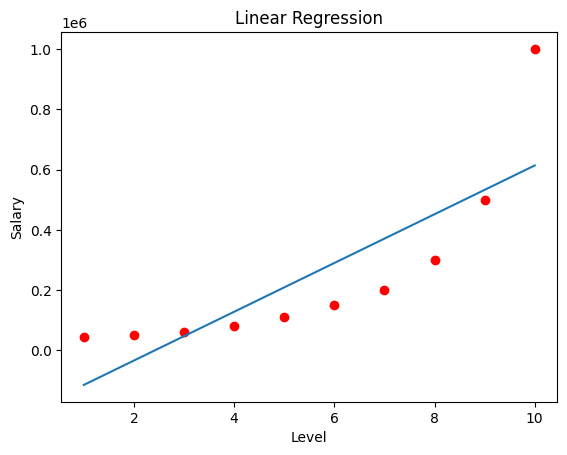

In [40]:
# Step 3 - Visualize Linear Regression Results
import matplotlib.pyplot as plt

plt.scatter(X, y, color="red")
plt.plot(X, lin_reg.predict(X))
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [41]:
# Step 4 - Linear Regression Prediction
lin_reg.predict([[6.5]])

array([330378.78787879])

In [42]:
# Step 5 - Convert X to polynomial format
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

In [43]:
# Step 6 - Passing X_poly Regression Results
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

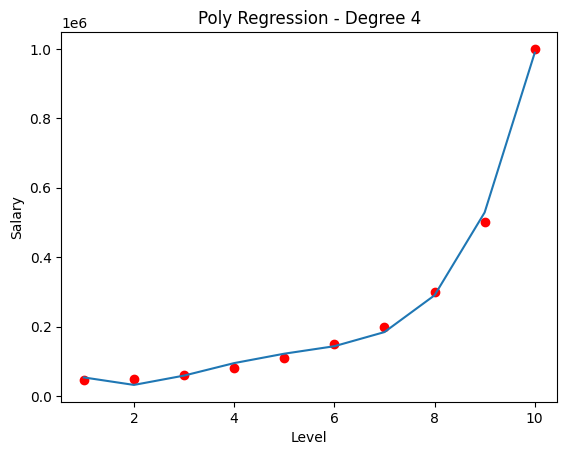

In [45]:
# Step 7 - Visualize Poly Regression Results
plt.scatter(X, y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression - Degree 4")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [46]:
# Step 8 - Polynomial Regression Prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("The predicted salary of a person at leve 6.5 is", new_salary_pred)

The predicted salary of a person at leve 6.5 is [158862.45265155]
